Лабоарторная работа № 2
Степашкин Иван РК6-64б 


Задание:
    Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. 
    Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно 
    заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize 

Решение:
    Рассмотрим модель Вольтерра - Лотки:
    { dx/dt = (alpha - beta × y) × x; dy/dt = (-gamma + delta × x) × y },
    где где x — количество жертв, y — количество хищников, t — время, alpha, beta, gamma, delta  — коэффициенты, отражающие взаимодействия между видами.

Из этого следует стационарные x, y:
x = gamma / delta
y = alpha / beta

In [2]:
x=1
y=1

def mark(parameters):
    alpha=parameters[0]
    beta=parameters[1]
    gamma=parameters[2]
    delta=parameters[3]
    #стационарные x и y
    start_x=gamma/delta
    start_y=alpha/beta
    #формулу константы с, полученную из модели Вольтерра-Лотки, посредством избавления от dt и далее интегрируя:
    c = beta * y + delta * x - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x))
    #рассчитаем минимальное количество хищников и жертв
    def x_func(x):
        return beta * start_y + delta * x - alpha * np.log(np.abs(start_y))- gamma * np.log(np.abs(x)) - c
    
    def y_func(y):
        return beta * y + delta * start_x - alpha * np.log(np.abs(y))- gamma * np.log(np.abs(start_x)) - c

    min_x = fsolve(x_func, 0.001)
    min_y = fsolve(y_func, 0.001)
    # На пике падения количества жертв их должно быть на 50% больше количества хищников
    return np.abs(min_y / min_x - 1.5)

Для соблюдения критерия устойчивости важно определить параметры модели, при которых количество жертв и хищников на пике роста или падения минимально различаются.
Чтобы найти данные параметры рассматриваемой модели, которые будут минимизировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования, необходимо численно найти минимальные значения популяции хищников и жертв.

In [3]:
class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        self.pred_init = pred_init
        self.prey_init = prey_init
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        for i in range(self._n_iters - 1):
          self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
          self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred
    #график количества жертв и хищников в рассматриваемые моменты времени 
    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='r')
        plt.plot(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()
    #график, где x и y будут является координатами особой точки - фокуса фазовой траектори, отражающей количество жертв и хищников
    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()

alpha =  0.9132
beta =   0.754
gamma =  1.0589
delta =  1.3459


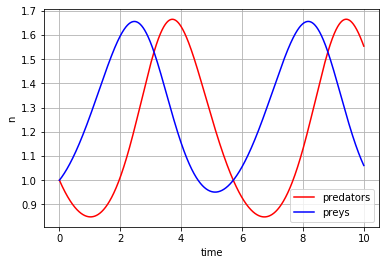

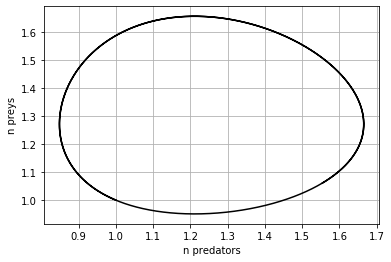

In [4]:
solution = minimize(mark, [1, 1, 1, 1])
print("alpha = ", round(solution.x[0], 4))
print("beta =  ", round(solution.x[1], 4))
print("gamma = ", round(solution.x[2], 4))
print("delta = ", round(solution.x[3], 4))
biome = Biome(pred_init=y, prey_init=x, tmax=10, dt=0.0001)
biome.run(solution.x[0], solution.x[1], solution.x[2], solution.x[3])
biome.plot()
biome.plot_cycle()